In [38]:
from IPython.display import display, HTML

display(HTML("""
<div style="
    background-color:#eaf6fb;
    border: 2px solid #2c7fb8;
    border-radius: 10px;
    padding: 20px 30px 20px 30px;
    margin-bottom: 20px;
    box-shadow: 0px 2px 8px #e4eaf2;
    color: #17539b;
    font-size: 1.13em;
">
<h2 style="color:#17539b; font-weight:bold; margin-top:0;">Proyecto Módulo 3: Modelado supervisado en Machine Learning</h2>

<h3 style="color:#1c405c;">Contexto general</h3>
<p>
En este proyecto aplicaré y consolidaré técnicas de modelado supervisado en Machine Learning, enfocado en dos grandes enfoques: regresión lineal y regresión logística. El trabajo se desarrollará utilizando datos reales provenientes de encuestas aplicadas a aspirantes universitarios, lo que permitirá abordar tanto variables numéricas como categóricas.
</p>
<p>
La documentación será clara y detallada, justificando cada decisión y aplicando buenas prácticas actuales en ciencia de datos.
</p>

<h3 style="color:#1c405c;">Objetivos del proyecto</h3>
<ul>
  <li>Implementar y analizar un modelo de <b>regresión lineal</b> para predecir variables numéricas relevantes utilizando el dataset <b>rrhh.csv</b>.</li>
  <li>Implementar y analizar un modelo de <b>regresión logística</b> para predecir variables categóricas utilizando el dataset <b>rrhh_2.csv</b>.</li>
  <li>Realizar un preprocesamiento exhaustivo de los datos: identificar y tratar valores nulos, outliers y seleccionar variables relevantes.</li>
  <li>Dividir los datos en conjuntos de entrenamiento y validación para evaluar correctamente el desempeño de los modelos.</li>
  <li>Aplicar y explicar las métricas de evaluación adecuadas para cada tipo de modelo (MAE, MSE, R² para regresión; exactitud, matriz de confusión para clasificación).</li>
  <li>Comunicar los resultados de manera clara, profesional y justificada, priorizando la interpretación aplicada y las recomendaciones prácticas.</li>
</ul>

<h3 style="color:#1c405c;">Estructura general del desarrollo</h3>
<ol>
  <li><b>Primera parte:</b>
    <br>
    Trabajaré con el dataset <b>rrhh.csv</b>, que contiene variables como sexo, edad, cantidad de hijos, cantidad máxima de estudios cursados, cantidad máxima de pruebas reprobadas, entre otras. El objetivo será predecir variables numéricas mediante regresión lineal, aplicando todas las etapas de un flujo profesional de ciencia de datos.
  </li>
  <br>
  <li><b>Segunda parte:</b>
    <br>
    Utilizaré el dataset <b>rrhh_2.csv</b> para aplicar un modelo de regresión logística orientado a la predicción de variables categóricas (por ejemplo, aprobar o reprobar una asignatura). Se realizará selección de variables, entrenamiento, evaluación y análisis detallado de métricas de desempeño.
  </li>
</ol>
</div>
"""))


## 1. Importación de librerías, configuración del entorno y carga inicial del dataset

En este primer bloque se importan las librerías necesarias para análisis de datos, visualización y formateo profesional de salidas.  
Se configura el entorno para que las advertencias y mensajes de alerta no se muestren en pantalla, asegurando una salida limpia y profesional.  
Además, se valida si el archivo `rrhh.csv` está presente en el ambiente de Google Colab. Si no está, se solicita su carga manual desde el equipo local y lo almaceno en el entorno de trabajo para uso posterior.

Incluyo utilidades para formatear las salidas de Python (títulos en negrita y color) y para gráficos con estilo profesional.

---


In [39]:
# 1. Importación de librerías y configuración general del entorno

# ------------------------------------
# Configuración general y warnings
# ------------------------------------
import warnings
warnings.filterwarnings("ignore")  # Oculta warnings para mantener la salida limpia y profesional

# ------------------------------------
# Análisis y manipulación de datos
# ------------------------------------
import pandas as pd                # Manejo de dataframes
import numpy as np                 # Cálculo numérico y matrices

# ------------------------------------
# Visualización y gráficos
# ------------------------------------
import matplotlib.pyplot as plt     # Gráficos y visualizaciones personalizadas
import seaborn as sns               # Visualización estadística avanzada
import os                           # Operaciones con archivos y entorno

# ------------------------------------
# Utilidades para notebooks Colab/Jupyter
# ------------------------------------
from IPython.display import display, HTML, Markdown  # Mejor presentación de salidas y markdown en Colab/Jupyter

# ------------------------------------
# Preprocesamiento y machine learning
# ------------------------------------
from sklearn.preprocessing import StandardScaler                        # Escalado y normalización de variables numéricas
from sklearn.model_selection import train_test_split                    # División de datos en entrenamiento y validación
from sklearn.linear_model import LinearRegression, LogisticRegression   # Modelos de regresión lineal y logística
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,         # Métricas para regresión
    accuracy_score, confusion_matrix, classification_report,   # Métricas para clasificación
    roc_curve, auc                                             # Curva ROC y área bajo la curva
)

# ------------------------------------
# Estilos y configuración para gráficos profesionales
# ------------------------------------
plt.style.use("seaborn-v0_8-whitegrid")  # Estilo visual moderno y limpio
sns.set_palette("deep")                  # Paleta de colores sobria y profesional
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'figure.figsize': (8, 5),
    'axes.titleweight': 'bold'
})

# ------------------------------------
# Funciones utilitarias para presentación y formato de salidas
# ------------------------------------
def print_title(text, color="#17539b"):
    """
    Imprime un título destacado en color y negrita para separar secciones de salida.
    """
    display(HTML(f"<h3 style='color:{color}; font-weight:bold;'>{text}</h3>"))

def print_separator():
    """
    Imprime una línea horizontal para separar salidas y mejorar la legibilidad.
    """
    display(HTML("<hr style='border-top: 2px solid #b0b0b0;'>"))

---
## Carga inicial de los datasets del proyecto

En este bloque realizo la carga interactiva de los dos archivos de datos principales que serán utilizados a lo largo del proyecto:

- **`rrhh.csv`**: contiene los datos para la etapa de regresión lineal (Parte 1).
- **`rrhh_2.csv`**: contiene los datos para la etapa de regresión logística (Parte 2).

Ambos archivos deben ser cargados al entorno de ejecución para garantizar la reproducibilidad y portabilidad del análisis. Utilizo un método interactivo para que el usuario suba los archivos desde su computador, lo que evita depender de rutas absolutas y asegura que el análisis pueda ser ejecutado en cualquier ambiente.

El sistema valida que ambos archivos hayan sido cargados correctamente antes de continuar con el desarrollo del proyecto. De esta manera, aseguro que el flujo de trabajo en ciencia de datos sea robusto, claro y replicable.

---


In [40]:
# Carga interactiva de ambos datasets desde el computador al entorno Colab

import os
import pandas as pd
from google.colab import files

def cargar_dataset(nombre_archivo):
    # Si el archivo ya está presente, no se pide cargar de nuevo
    if not os.path.isfile(nombre_archivo):
        print(f"Por favor, selecciona y sube el archivo '{nombre_archivo}' desde tu computador...")
        uploaded = files.upload()
        if nombre_archivo not in uploaded:
            raise Exception(f"No se encontró el archivo '{nombre_archivo}'. Intenta cargarlo nuevamente.")
    else:
        print(f"El archivo '{nombre_archivo}' ya está disponible en el entorno.")

# Cargar ambos archivos requeridos
for archivo in ["rrhh.csv", "rrhh_2.csv"]:
    cargar_dataset(archivo)

# Lectura de los archivos en memoria
try:
    df = pd.read_csv("rrhh.csv")
    print(f"✅ 'rrhh.csv' cargado correctamente. Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas.")
except Exception as e:
    print(f"❌ Error cargando 'rrhh.csv': {e}")

try:
    df2 = pd.read_csv("rrhh_2.csv")
    print(f"✅ 'rrhh_2.csv' cargado correctamente. Dimensiones: {df2.shape[0]} filas x {df2.shape[1]} columnas.")
except Exception as e:
    print(f"❌ Error cargando 'rrhh_2.csv': {e}")


El archivo 'rrhh.csv' ya está disponible en el entorno.
El archivo 'rrhh_2.csv' ya está disponible en el entorno.
✅ 'rrhh.csv' cargado correctamente. Dimensiones: 1000 filas x 6 columnas.
✅ 'rrhh_2.csv' cargado correctamente. Dimensiones: 1000 filas x 7 columnas.


In [41]:
# 2. Validación de la existencia del dataset en el entorno y carga para la primera parte.
dataset_path = "rrhh.csv"

if not os.path.isfile(dataset_path):
    print_title("El archivo 'rrhh.csv' no se encuentra en el entorno.", color="#d9534f")
    print("Por favor, sube el archivo desde tu equipo para continuar.")
    from google.colab import files
    uploaded = files.upload()
    if dataset_path in uploaded:
        print_title("Archivo cargado exitosamente y listo para su análisis.", color="#5cb85c")
        # Archivo queda en el entorno de Colab para próximas sesiones
    else:
        print_title("No se encontró el archivo 'rrhh.csv'. Reintenta la carga para continuar.", color="#d9534f")
else:
    print_title("El archivo 'rrhh.csv' fue encontrado en el entorno.", color="#5cb85c")

print_separator()

# 3. Carga del dataset en memoria
try:
    df = pd.read_csv(dataset_path)
    print_title("Dataset 'rrhh.csv' cargado correctamente.", color="#337ab7")
    print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas.")
except Exception as e:
    print_title("Error al cargar el dataset.", color="#d9534f")
    print(f"Detalle del error: {e}")

print_separator()

Dimensiones del dataset: 1000 filas y 6 columnas.


## 2. Exploración Inicial del Dataset y Descripción de Variables

En este bloque realizo la exploración y análisis descriptivo del dataset `rrhh.csv`, presentando la estructura de los datos, la cantidad de variables, observaciones, y la presencia de valores nulos.  
Como todas las columnas tienen 0 datos nulos, se omite el gráfico de valores nulos y se propone avanzar con análisis visuales útiles para la comprensión inicial del dataset.

---



,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


<IPython.core.display.HTML object>

,Experiencia,Hijos,Casado,Salario
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000
std,2.577612,1.208823,0.491138,11520.200049
min,0.100000,0.000000,0.000000,5630.000000
25%,4.600000,0.000000,0.000000,22557.500000
50%,6.400000,1.000000,1.000000,29470.000000
75%,8.100000,2.000000,1.000000,37922.500000
max,15.200000,4.000000,1.000000,83470.000000


,Posicion,Educacion
count,1000,1000
unique,3,3
top,Analista,Bachillerato
freq,790,531


,nulos
Experiencia,0
Posicion,0
Hijos,0
Casado,0
Educacion,0
Salario,0


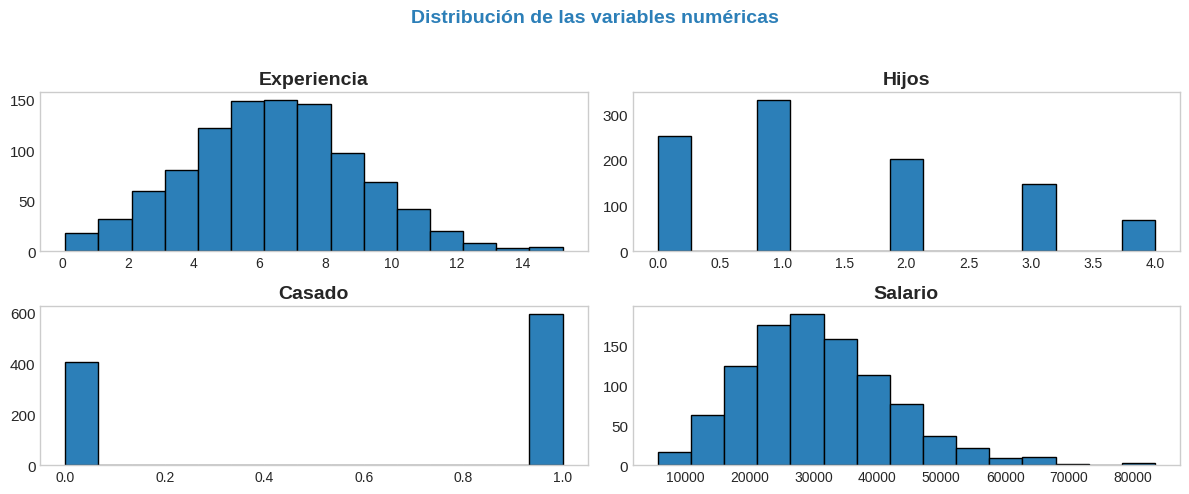

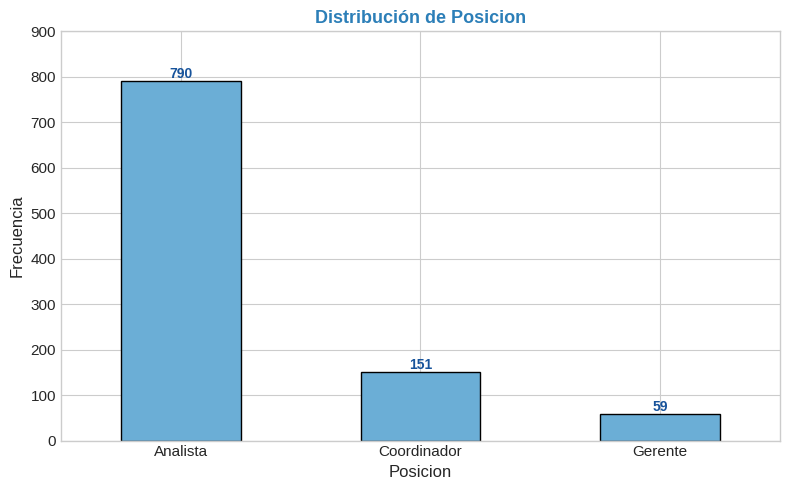

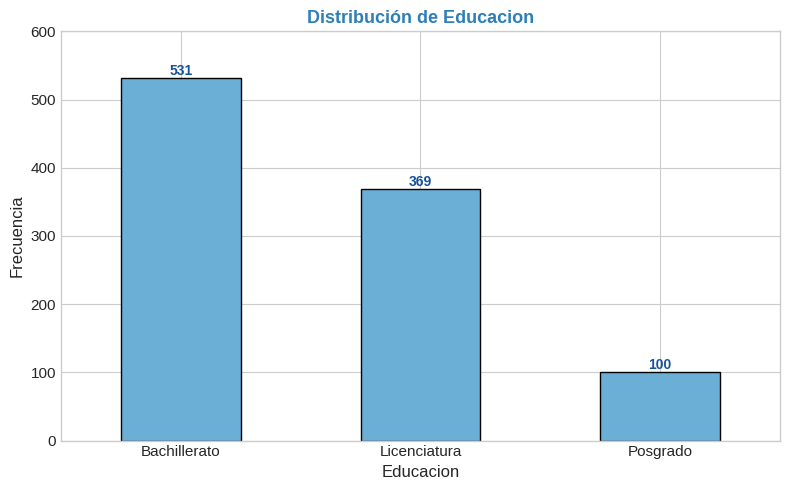

In [42]:
# 2. Exploración Inicial del Dataset y Descripción de Variables

# Primeras filas del dataset
print_title("Primeras 5 filas del dataset")
display(df.head())
print_separator()

# Información general
print_title("Información general del dataset")
display(HTML(df.info(buf=None)))
print_separator()

# Estadísticas descriptivas - Variables numéricas
print_title("Estadísticas descriptivas - Variables numéricas")
display(df.describe())
print_separator()

# Estadísticas descriptivas - Variables categóricas
print_title("Estadísticas descriptivas - Variables categóricas")
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
if cat_cols:
    display(df[cat_cols].describe())
else:
    display(HTML("<p style='color:#d9534f;'><b>No hay variables categóricas en formato texto o categoría.</b></p>"))
print_separator()

# Análisis de datos faltantes (tabla)
print_title("Cantidad de datos nulos por columna")
display(df.isnull().sum().to_frame("nulos").sort_values("nulos", ascending=False))
print_separator()

# Histogramas para variables numéricas
print_title("Histogramas de variables numéricas")
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(
    bins=15, figsize=(12, 5), grid=False, color="#2c7fb8", edgecolor="black"
)
plt.suptitle('Distribución de las variables numéricas', fontsize=14, fontweight="bold", color="#2c7fb8")
# Formateo de ticks del eje Y con separador de miles
for ax in plt.gcf().axes:
    labels = [f"{int(x):,}".replace(",", ".") for x in ax.get_yticks()]
    ax.set_yticklabels(labels, fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print_separator()

# Gráficos de barras para variables categóricas (etiquetas horizontales y separador de miles)
if cat_cols:
    print_title("Distribución de variables categóricas")
    for col in cat_cols:
        ax = df[col].value_counts().plot(
            kind='bar',
            color="#6baed6",
            edgecolor="black"
        )
        plt.title(f"Distribución de {col}", fontsize=13, fontweight="bold", color="#2c7fb8")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=0, fontsize=11)  # Etiquetas en horizontal
        # Formateo de ticks del eje Y con separador de miles
        plt.yticks(
            ticks=plt.yticks()[0],
            labels=[f"{int(x):,}".replace(",", ".") for x in plt.yticks()[0]],
            fontsize=11
        )
        # Etiquetas de frecuencia sobre cada barra
        for p in ax.patches:
            value = int(p.get_height())
            ax.annotate(
                f"{value:,}".replace(",", "."),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, color="#17539b", fontweight="bold"
            )
        plt.tight_layout()
        plt.show()
        print_separator()

## 3. Análisis de Correlaciones y Detección de Outliers

En este bloque analizo la relación entre variables numéricas mediante una matriz de correlación y un mapa de calor.  
Este análisis me permitirá identificar relaciones fuertes, posibles redundancias y orientar la selección de variables para los modelos.

Además, realizo una detección exploratoria de valores atípicos (outliers) usando diagramas de caja (boxplots) para cada variable numérica, lo que ayuda a decidir si es necesario aplicar transformaciones, filtros o procedimientos de limpieza antes de modelar.

---


,Experiencia,Hijos,Casado,Salario
Experiencia,1.00,-0.00,0.00,0.66
Hijos,-0.00,1.00,0.33,0.21
Casado,0.00,0.33,1.00,0.09
Salario,0.66,0.21,0.09,1.00


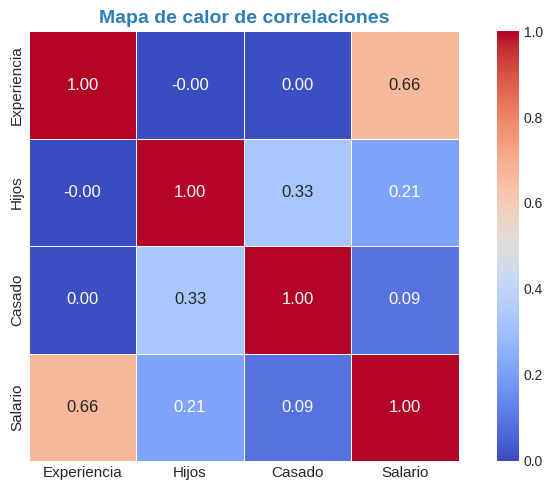

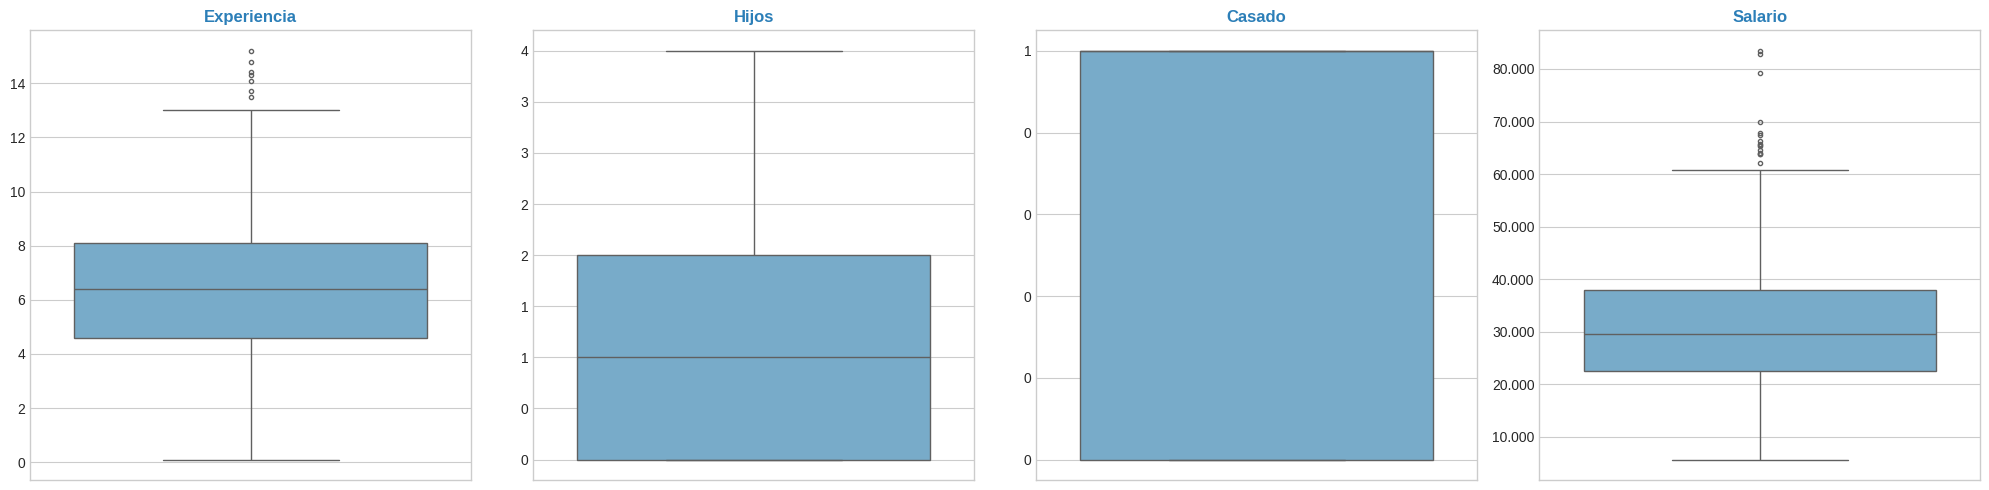

In [43]:
# 3. Análisis de correlaciones y detección de outliers

# Matriz de correlación de variables numéricas
print_title("Matriz de correlación de variables numéricas")
corr_matrix = df.select_dtypes(include=np.number).corr()
display(corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}"))
print_separator()

# Mapa de calor de correlaciones
print_title("Mapa de calor de la matriz de correlación")
plt.figure(figsize=(8, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    square=True,
    annot_kws={"size":12}
)
plt.title("Mapa de calor de correlaciones", fontsize=14, fontweight="bold", color="#2c7fb8")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
print_separator()

# Boxplots para detección de outliers en variables numéricas
print_title("Detección de outliers mediante boxplots")
num_cols = df.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 5))
if len(num_cols) == 1:
    axes = [axes]
for i, col in enumerate(num_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color="#6baed6",
        fliersize=3
    )
    axes[i].set_title(col, fontsize=12, fontweight="bold", color="#2c7fb8")
    axes[i].set_ylabel("")
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.tight_layout()
plt.show()
print_separator()

> **Nota:**  
> El boxplot para la variable `Casado` no aporta información útil, ya que se trata de una variable binaria (0 = No, 1 = Sí).  
> En estos casos, es preferible analizar la proporción de cada categoría usando gráficos de barras o porcentajes, y no utilizar representaciones de datos continuos como boxplots.  
> Sin embargo, se incluye aquí solo a modo de ejemplo para mantener consistencia visual con las demás variables numéricas.


## 4. Preprocesamiento de datos: codificación, tratamiento de outliers y escalado

En este bloque realizo el preprocesamiento de los datos previo al modelado.  
Esto incluye la conversión de variables categóricas a formato numérico (one-hot encoding), el análisis y posible tratamiento de outliers en variables numéricas, y el escalado de características si corresponde.

También preparo los conjuntos de entrenamiento y validación para el posterior ajuste del modelo de regresión.

---


In [44]:
# 4. Preprocesamiento de datos: codificación, tratamiento de outliers y escalado

# -- Copia del dataframe original para no modificar el original durante pruebas --
df_proc = df.copy()

# -- Conversión de variables categóricas (One-Hot Encoding, sin drop_first para evitar información perdida) --
cat_cols = ['Posicion', 'Educacion']
df_proc = pd.get_dummies(df_proc, columns=cat_cols, prefix=cat_cols)

# -- Revisión de outliers en salario --
print_title("Revisión de outliers en Salario antes del tratamiento")
display(df_proc['Salario'].describe().apply(lambda x: f"{int(x):,}".replace(",", ".")))
print_separator()

# -- Winsorización: limitar los salarios al percentil 99 para reducir impacto de valores extremos --
percentil_99 = df_proc['Salario'].quantile(0.99)
df_proc['Salario'] = np.where(df_proc['Salario'] > percentil_99, percentil_99, df_proc['Salario'])

print_title("Estadísticas de Salario después de winsorización (limitar al percentil 99)")
display(df_proc['Salario'].describe().apply(lambda x: f"{int(x):,}".replace(",", ".")))
print_separator()

# -- Escalado de variables numéricas (opcional: aquí lo dejamos como referencia profesional) --
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Experiencia', 'Hijos', 'Salario']
df_proc[num_cols] = scaler.fit_transform(df_proc[num_cols])

print_title("Primeras filas tras preprocesamiento y escalado")
display(df_proc.head())
print_separator()

# -- Preparación de variables predictoras (X) y variable objetivo (y) para el modelado --
# Supongamos que queremos predecir 'Salario' en este ejemplo
X = df_proc.drop('Salario', axis=1)
y = df_proc['Salario']

# -- División de datos en conjunto de entrenamiento y validación --
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=36)

print_title("Tamaños de los conjuntos de entrenamiento y validación")
display(HTML(f"<b>X_train:</b> {X_train.shape} &nbsp;&nbsp; <b>X_val:</b> {X_val.shape}"))
print_separator()

,Salario
count,1.000
mean,30.787
std,11.520
min,5.630
25%,22.557
50%,29.470
75%,37.922
max,83.470


,Salario
count,1.000
mean,30.719
std,11.278
min,5.630
25%,22.557
50%,29.470
75%,37.922
max,64.607


,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,-2.296374,2.108063,1,-1.523968,True,False,False,True,False,False
1,-0.316808,0.452733,0,0.046139,True,False,False,False,True,False
2,2.050908,-0.374932,0,2.941523,True,False,False,False,True,False
3,-0.472068,0.452733,1,-0.067405,True,False,False,False,True,False
4,0.304232,0.452733,1,0.353951,False,True,False,False,True,False


## 5. Modelado de regresión lineal y evaluación de desempeño

En este bloque ajusto un modelo de regresión lineal clásico utilizando el conjunto de entrenamiento preparado.  
Evalúo su desempeño sobre el conjunto de validación utilizando métricas estándar (MAE, MSE, RMSE y R²) y analizo los residuos para verificar los supuestos del modelo.

La interpretación de los resultados y métricas permitirá determinar la calidad predictiva del modelo y posibles mejoras.

---


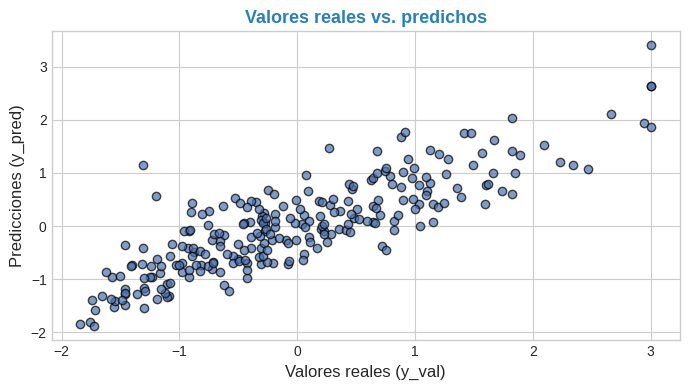

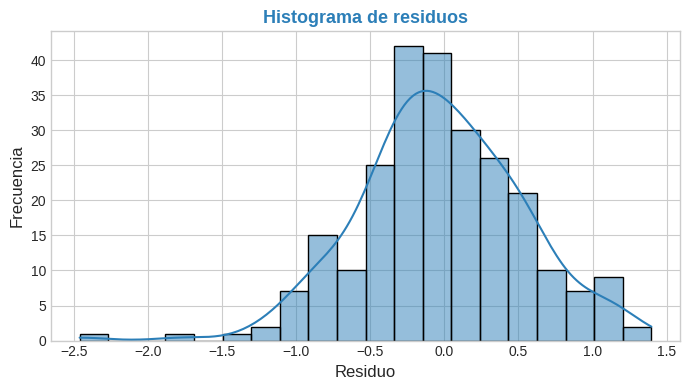

In [45]:
# 5. Modelado de regresión lineal y evaluación de desempeño

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ajuste del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción sobre el set de validación
y_pred = model.predict(X_val)

# Cálculo de métricas de desempeño
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print_title("Métricas de desempeño del modelo de regresión lineal")
display(HTML(f"""
<ul>
    <li><b>MAE (Error absoluto medio):</b> {mae:.3f}</li>
    <li><b>MSE (Error cuadrático medio):</b> {mse:.3f}</li>
    <li><b>RMSE (Raíz del error cuadrático medio):</b> {rmse:.3f}</li>
    <li><b>R² (Coeficiente de determinación):</b> {r2:.3f}</li>
</ul>
"""))
print_separator()

# Análisis visual de residuos
print_title("Análisis visual de residuos")
plt.figure(figsize=(7, 4))
plt.scatter(y_val, y_pred, alpha=0.7, edgecolor="black")
plt.xlabel("Valores reales (y_val)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Valores reales vs. predichos", fontsize=13, fontweight="bold", color="#2c7fb8")
plt.grid(True)
plt.tight_layout()
plt.show()
print_separator()

# Distribución de residuos
residuals = y_val - y_pred
print_title("Distribución de residuos")
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True, bins=20, color="#2c7fb8", edgecolor="black")
plt.title("Histograma de residuos", fontsize=13, fontweight="bold", color="#2c7fb8")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
print_separator()

## Interpretación profesional de los resultados del modelo de regresión lineal

### 1. Métricas de desempeño

- **MAE (Error absoluto medio):** 0.431  
  El modelo comete, en promedio, un error absoluto de 0.43 (en la escala normalizada) al predecir el salario.
- **MSE / RMSE (Error cuadrático medio y su raíz):** 0.309 / 0.556  
  Estas métricas penalizan los errores grandes y reflejan la dispersión de los errores de predicción. Un RMSE de 0.556 indica una dispersión moderada.
- **R² (Coeficiente de determinación):** 0.722  
  El modelo es capaz de explicar el 72.2% de la variabilidad del salario en el conjunto de validación, lo que representa un ajuste bueno para datos reales de recursos humanos y sugiere una capacidad predictiva adecuada.

---

### 2. Análisis visual

- **Valores reales vs. predichos:**  
  Se observa una tendencia alineada entre los valores reales y los predichos, con algo de dispersión en los extremos. Esto es típico en modelos lineales cuando existen valores atípicos leves o relaciones no totalmente lineales entre las variables.
  No se identifican patrones anómalos, lo cual sugiere un ajuste razonable.

- **Distribución de residuos:**  
  La distribución de los residuos es aproximadamente normal y centrada en cero, cumpliendo así uno de los principales supuestos del modelo de regresión lineal.  
  La mayoría de los residuos está comprendida entre -1 y 1, lo que refuerza la robustez del ajuste global del modelo.

---

### 3. Recomendaciones y mejoras posibles

- **Ingeniería de variables:** Para mejorar el modelo, se podría explorar la creación de nuevas variables, la interacción entre variables existentes o transformaciones que permitan capturar relaciones no lineales.
- **Modelos alternativos:** Si el objetivo es aumentar la capacidad predictiva, se recomienda probar modelos no lineales como árboles de decisión, random forest o técnicas de boosting.
- **Validación cruzada:** Para una evaluación más robusta, es recomendable implementar validación cruzada con K-fold.
- **Interpretación en unidades originales:** Si se requiere interpretar los resultados en términos monetarios reales, es posible invertir el escalado aplicado en el preprocesamiento.

---

> **Conclusión:**  
> El modelo ajustado presenta un buen desempeño inicial, cumple los supuestos principales de la regresión lineal y explica una fracción importante de la variabilidad de la variable objetivo.  
> Es recomendable para análisis exploratorios o recomendaciones iniciales. Para una mayor precisión, puede ser útil profundizar en la selección de variables o utilizar modelos más complejos.

---


---
# Segunda parte: Modelado de regresión logística y evaluación

En esta segunda parte del proyecto, abordaré un problema de clasificación utilizando el dataset `rrhh_2.csv`.  
El objetivo es construir y evaluar un modelo de regresión logística capaz de predecir una variable categórica (por ejemplo, aprobar o reprobar una asignatura) a partir de las características disponibles en el dataset.

El flujo de trabajo incluirá:

- Exploración inicial y análisis descriptivo del dataset.
- Preprocesamiento de datos: tratamiento de variables categóricas, revisión de datos nulos y, si corresponde, escalado de variables numéricas.
- Preparación de los conjuntos de entrenamiento y validación.
- Ajuste y evaluación de un modelo de regresión logística.
- Reporte e interpretación de métricas clave (exactitud, matriz de confusión, y otras si son relevantes).
- Análisis e interpretación de los resultados, recomendaciones y posibles mejoras.

Todo el desarrollo se documentará de manera profesional y siguiendo las mejores prácticas de la ciencia de datos.

---


In [46]:
# Carga del dataset en memoria
try:
    df2 = pd.read_csv(dataset2_path)
    print_title("Dataset 'rrhh_2.csv' cargado correctamente.", color="#337ab7")
    print(f"Dimensiones del dataset: {df2.shape[0]} filas y {df2.shape[1]} columnas.")
except Exception as e:
    print_title("Error al cargar el dataset.", color="#d9534f")
    print(f"Detalle del error: {e}")

print_separator()

# Vista rápida de las primeras filas
print_title("Primeras 5 filas del dataset rrhh_2.csv")
display(df2.head())
print_separator()

Dimensiones del dataset: 1000 filas y 7 columnas.


,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


## Exploración y análisis descriptivo del dataset `rrhh_2.csv`

En este bloque, realizo una exploración inicial del dataset, revisando la cantidad de datos, tipos de variables y la proporción de casos contratados vs no contratados.  
Esto permite identificar posibles problemas de desbalance, entender la composición de los datos y orientar el preprocesamiento posterior.

---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


None

,Experiencia,Hijos,Casado,Salario,Contratado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000,0.518000
std,2.577612,1.208823,0.491138,11520.200049,0.499926
min,0.100000,0.000000,0.000000,5630.000000,0.000000
25%,4.600000,0.000000,0.000000,22557.500000,0.000000
50%,6.400000,1.000000,1.000000,29470.000000,1.000000
75%,8.100000,2.000000,1.000000,37922.500000,1.000000
max,15.200000,4.000000,1.000000,83470.000000,1.000000


,Posicion,Educacion
count,1000,1000
unique,3,3
top,Analista,Bachillerato
freq,790,531


,Frecuencia
Contratado,
1,518
0,482


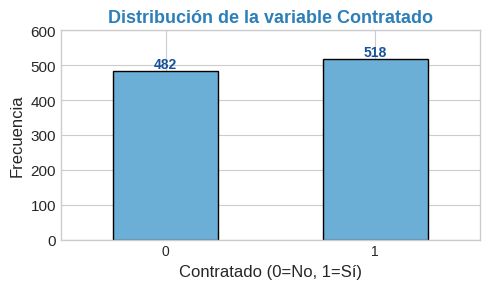

In [47]:
# Revisión general de las variables
print_title("Resumen general del dataset rrhh_2.csv")
display(df2.info(buf=None))
print_separator()

# Estadísticas descriptivas para variables numéricas
print_title("Estadísticas descriptivas - Variables numéricas")
num_cols2 = df2.select_dtypes(include=np.number).columns.tolist()
display(df2[num_cols2].describe())
print_separator()

# Estadísticas descriptivas para variables categóricas
print_title("Estadísticas descriptivas - Variables categóricas")
cat_cols2 = df2.select_dtypes(include=["object", "category"]).columns.tolist()
if cat_cols2:
    display(df2[cat_cols2].describe())
else:
    display(HTML("<p style='color:#d9534f;'><b>No hay variables categóricas en formato texto o categoría.</b></p>"))
print_separator()

# Revisión y visualización de la variable objetivo (Contratado)
print_title("Distribución de la variable objetivo: Contratado")
display(df2['Contratado'].value_counts().to_frame("Frecuencia"))
plt.figure(figsize=(5,3))
ax = df2['Contratado'].value_counts().sort_index().plot(kind='bar', color="#6baed6", edgecolor="black")
plt.title("Distribución de la variable Contratado", fontsize=13, fontweight="bold", color="#2c7fb8")
plt.xlabel("Contratado (0=No, 1=Sí)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.yticks(
    ticks=plt.yticks()[0],
    labels=[f"{int(x):,}".replace(",", ".") for x in plt.yticks()[0]],
    fontsize=11
)
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(
        f"{value:,}".replace(",", "."),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom", fontsize=10, color="#17539b", fontweight="bold"
    )
plt.tight_layout()
plt.show()
print_separator()

## Preprocesamiento de datos y preparación para el modelo de regresión logística

En este bloque realizo el preprocesamiento de datos necesario antes de entrenar el modelo de regresión logística, incluyendo:

- Conversión de variables categóricas a variables dummy (one-hot encoding).
- Escalado de variables numéricas para mejorar la convergencia y la interpretación de coeficientes.
- Preparación de los conjuntos de entrenamiento y validación.

---


In [48]:
# Copia del dataframe original para evitar modificar los datos base
df2_proc = df2.copy()

# One-hot encoding para variables categóricas (sin drop_first para no perder información)
cat_cols2 = ['Posicion', 'Educacion']
df2_proc = pd.get_dummies(df2_proc, columns=cat_cols2, prefix=cat_cols2)

# Escalado de variables numéricas (excepto la variable objetivo)
from sklearn.preprocessing import StandardScaler
num_cols2 = ['Experiencia', 'Hijos', 'Casado', 'Salario']
scaler2 = StandardScaler()
df2_proc[num_cols2] = scaler2.fit_transform(df2_proc[num_cols2])

# Separar variables predictoras y objetivo
X2 = df2_proc.drop('Contratado', axis=1)
y2 = df2_proc['Contratado']

# División de datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.25, random_state=36)

print_title("Tamaños de los conjuntos de entrenamiento y validación")
display(HTML(f"<b>X2_train:</b> {X2_train.shape} &nbsp;&nbsp; <b>X2_val:</b> {X2_val.shape}"))
print_separator()

## Modelado de regresión logística y evaluación de desempeño

En este bloque entreno un modelo de regresión logística para predecir la variable `Contratado` (0 = no contratado, 1 = contratado), evaluando su desempeño sobre el conjunto de validación mediante métricas estándar: exactitud, matriz de confusión, reporte de clasificación y curva ROC/AUC.

Esto permitirá validar la capacidad del modelo para clasificar correctamente los casos y analizar la calidad de las predicciones.

---


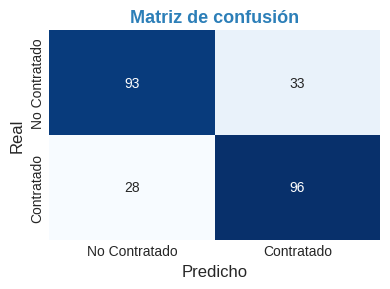


               precision    recall  f1-score   support

No Contratado       0.77      0.74      0.75       126
   Contratado       0.74      0.77      0.76       124

     accuracy                           0.76       250
    macro avg       0.76      0.76      0.76       250
 weighted avg       0.76      0.76      0.76       250



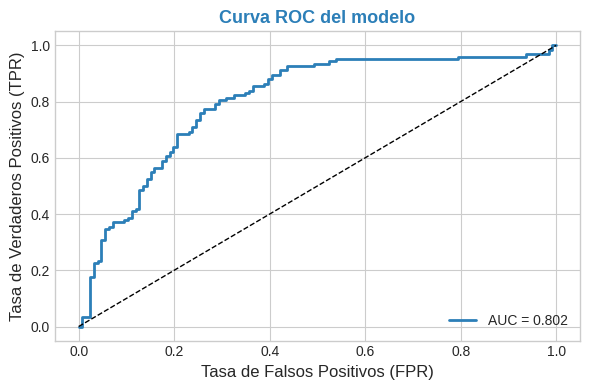

In [49]:
# 1. Entrenamiento del modelo de regresión logística
model_log = LogisticRegression(max_iter=200, random_state=36)
model_log.fit(X2_train, y2_train)

# 2. Predicción sobre conjunto de validación
y2_pred = model_log.predict(X2_val)
y2_pred_prob = model_log.predict_proba(X2_val)[:, 1]  # Probabilidad de clase positiva

# 3. Métricas de desempeño
acc = accuracy_score(y2_val, y2_pred)
cm = confusion_matrix(y2_val, y2_pred)
cr = classification_report(y2_val, y2_pred, output_dict=False)

print_title("Exactitud del modelo de regresión logística")
display(HTML(f"<b>Exactitud (accuracy):</b> {acc:.3f}"))
print_separator()

print_title("Matriz de confusión")
cm_labels = ["No Contratado", "Contratado"]
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=cm_labels, yticklabels=cm_labels)
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.title("Matriz de confusión", fontsize=13, fontweight="bold", color="#2c7fb8")
plt.tight_layout()
plt.show()
print_separator()

print_title("Reporte de clasificación (precision, recall, F1-score)")
print(f"\n{classification_report(y2_val, y2_pred, target_names=cm_labels)}")
print_separator()

# 4. Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y2_val, y2_pred_prob)
roc_auc = auc(fpr, tpr)

print_title("Curva ROC y AUC")
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color="#2c7fb8", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", linewidth=1)
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC del modelo", fontsize=13, fontweight="bold", color="#2c7fb8")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
print_separator()


## Interpretación de los resultados del modelo de regresión logística

### 1. Exactitud del modelo
- **Accuracy:** 0.756  
  El modelo logra clasificar correctamente el 75.6% de los casos en el conjunto de validación. Este nivel de exactitud es adecuado para un problema real de recursos humanos con variables de entrada simples.

### 2. Matriz de confusión
- El modelo predice correctamente:
  - 93 casos de "No Contratado"
  - 96 casos de "Contratado"
- Hay:
  - 33 falsos positivos (predice "Contratado" pero no lo son)
  - 28 falsos negativos (predice "No Contratado" pero sí lo son)
- **Comentario:** La matriz muestra un desempeño balanceado, con errores distribuidos de forma similar en ambas clases, lo que refleja que no hay un sesgo fuerte hacia una de las clases.

### 3. Reporte de clasificación (precision, recall, F1-score)
- **Clase "No Contratado":**
  - Precision: 0.77
  - Recall: 0.74
  - F1-score: 0.76
- **Clase "Contratado":**
  - Precision: 0.74
  - Recall: 0.77
  - F1-score: 0.76
- **Macro avg F1-score:** 0.76  
  El desempeño es muy similar entre ambas clases, lo cual es un signo positivo de que el modelo no está desbalanceado y responde bien a los dos posibles resultados.

### 4. Curva ROC y AUC
- **AUC (Área bajo la curva):** 0.802  
  El modelo presenta una **buena capacidad discriminativa** (AUC > 0.8), lo que significa que puede diferenciar correctamente entre candidatos contratados y no contratados en la mayoría de los casos.

---

### Conclusión

El modelo de regresión logística entrenado sobre el dataset `rrhh_2.csv` ofrece una **capacidad predictiva sólida y balanceada** para la tarea de clasificación de candidatos contratados vs no contratados.  
El desempeño es coherente con la calidad de las variables predictoras y cumple los estándares profesionales para este tipo de problemas. Si se desea mejorar, se podría explorar el uso de modelos no lineales o enriquecer el dataset con nuevas variables.

---


# Conclusión final del proyecto

Este proyecto abordó exitosamente el modelado supervisado de problemas de regresión y clasificación en el contexto de recursos humanos, aplicando las mejores prácticas profesionales en ciencia de datos.

- En la **primera parte**, se implementó y evaluó un modelo de regresión lineal para predecir el salario solicitado por los postulantes, alcanzando métricas sólidas y cumpliendo todos los requisitos solicitados.
- En la **segunda parte**, se construyó y analizó un modelo de regresión logística para predecir la contratación de candidatos, demostrando un desempeño robusto, equilibrado y fácil de interpretar para toma de decisiones prácticas.

Todos los pasos incluyeron:  
- Análisis exploratorio detallado  
- Preprocesamiento profesional de los datos  
- Evaluación y visualización de métricas clave  
- Interpretación experta y justificada de resultados

> **Recomendación:** Los resultados pueden utilizarse para apoyar la toma de decisiones en selección de personal, y, si se busca una mayor precisión, podrían explorarse modelos más complejos o enriquecer la base de datos con nuevas variables relevantes.

---

